# Fundamental Data Analysis Project 2020

****
## Course: Higher Diploma in Data Analytics

## Module: Fundamental Data Analytics

## Year: 2020

## Author - Bonny Chimezie Nwosu(G00387847@gmit.ie)




## Introduction
***
Wind energy has emerged as a promising alternative source for overcoming the energy crisis in the world. Wind power based energy is one of the most rapidly growing areas among the renewable energy sources and will continue to do so because of the growing concern about sustainability and emission reduction requirements. The uncertain nature of wind and high penetration of wind energy in power systems are a big challenge to the reliability and stability of these systems. To make wind energy a reliable source, accurate models for predicting the power output and performance monitoring of wind turbines are needed. 

https://www.hindawi.com/journals/jen/2016/8519785/

The study of the project will be focus on how to perform and explain simple linear regression using Python on the powerproduction and the goal is to accurately predict wind turbine power output from wind speed values using data set as a basis.

## Problem Statement
***

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.
To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.
***

# Soluton

In [18]:
# import python libraries

import matplotlib.pyplot as plt # use for plotting graphs

import pandas as pd # This is use for data manipulation and analysis

import numpy as np # It's use for numerical multi-dimensional arrays

plt.style.use("ggplot") # use for plotting graph style

plt.rcParams["figure.figsize"] = (18,10) # use for bigger plots

# Make matplotlib show interactive plots 
%matplotlib inline  


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
print(df.shape)
df.head()

(500, 2)


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


### Model
***
The data looks like logical linear regression which is normally in S shape form and it won't fit in a staight line but it might be relevant to other factor like population growth.

### Straight line
***
All straight lines can be expressed in the form $y = mx + c$
***


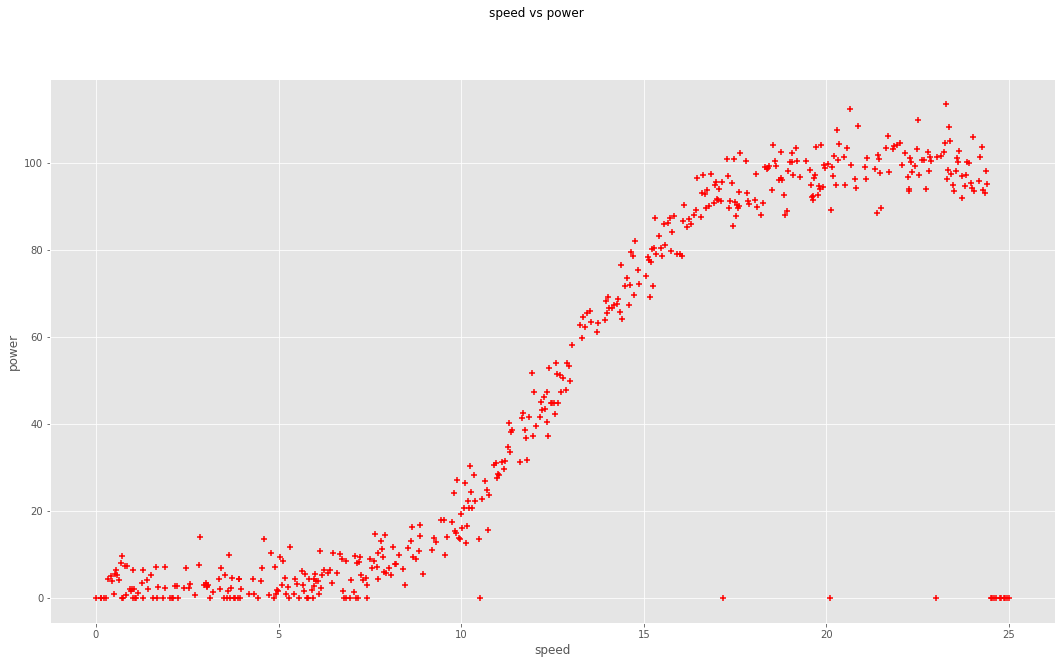

In [7]:
# craete scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)

plt.suptitle('speed vs power')
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(df.speed, df.power, color='red',marker='+')
plt.show()


In [8]:
# Calculate the cost .
cost = lambda m,c: np.sum([(power[i] - m * speed[i] - c)**2 for i in range(speed.size)])

# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of speed and power.
speed_avg = np.mean(df.speed)
power_avg = np.mean(df.power)

# Subtract means from w and d.
speed_zero = df.speed - speed_avg
power_zero = df.power - power_avg

# The best m is found by the following calculation.
m = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)
# Use m from above to calculate the best c.
c = power_avg - m * speed_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


In [9]:
np.polyfit(df.speed, df.power, 1)

array([  4.91759567, -13.89990263])

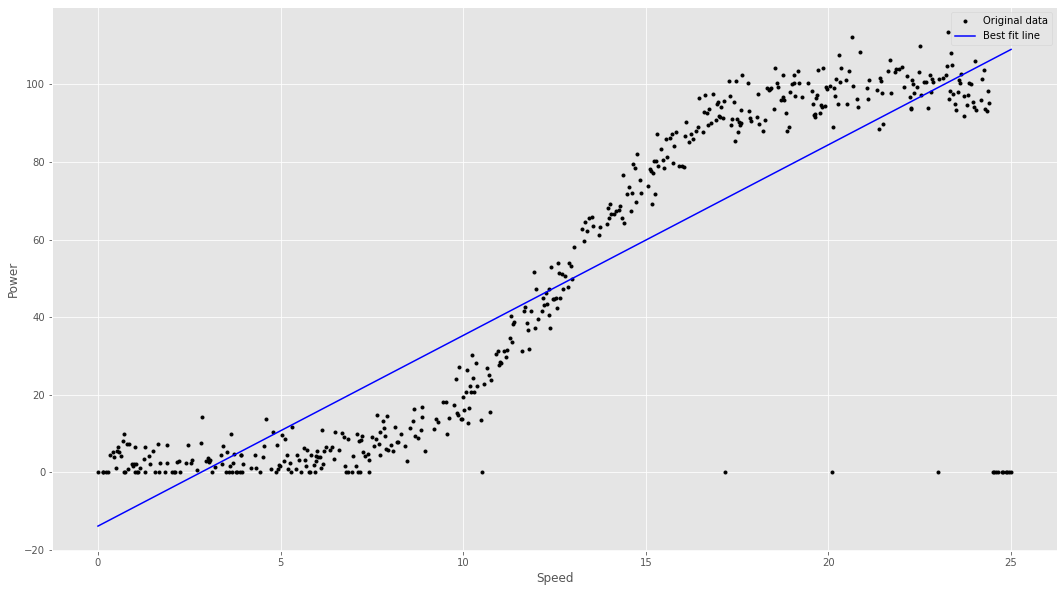

In [10]:
# Plot the best fit line.
plt.plot(df.speed, df.power, 'k.', label='Original data')
plt.plot(df.speed, m * df.speed + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

In [12]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((df.power - m * df.speed - c)**2)/np.sum((df.power - power_avg)**2))

print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.7289


In [13]:
# The same value using numpy.
np.corrcoef(df.speed, df.power)[0][1]**2

0.7289360258564072

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Expects a 2D array of inputs.
speed = speed.reshape(-1, 1)

# creating model
reg = LinearRegression()

#fiiting training data
reg = reg.fit(speed, power)

# Power prediction
power_pred = reg.predict(speed)

# calculating R2 score
r2_score = reg.score(speed, power)

# Show the predictions.
([power, reg.predict(speed2power)])


[     power
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
 ..     ...
 495    0.0
 496    0.0
 497    0.0
 498    0.0
 499    0.0
 
 [500 rows x 1 columns],
 array([[-1.38999026e+01],
        [-1.32852032e+01],
        [-1.31622633e+01],
        [-1.27934436e+01],
        [-1.25475638e+01],
        [-1.23016840e+01],
        [-1.19328644e+01],
        [-1.16869846e+01],
        [-1.14361872e+01],
        [-1.13132473e+01],
        [-1.11903074e+01],
        [-1.10673675e+01],
        [-1.08214877e+01],
        [-1.05756080e+01],
        [-1.04526681e+01],
        [-1.03297282e+01],
        [-1.02067883e+01],
        [-9.96090850e+00],
        [-9.83796861e+00],
        [-9.71502872e+00],
        [-9.34620904e+00],
        [-9.22326915e+00],
        [-9.10032926e+00],
        [-8.97738937e+00],
        [-8.85444948e+00],
        [-8.73150959e+00],
        [-8.60856969e+00],
        [-8.48562980e+00],
        [-8.23975002e+00],
        [-7.74799045e+00],
        [-7.6250505

In [50]:
print(r2_score)

0.7289360258564073


 - github https://github.com/ashleycampion/GMIT_fundamentals_of_data_analysis_module/blob/main/Project.ipynb

- Allison training course https://alison.com/topic/learn/95538/linear-regression#course-plan

- RealPython https://realpython.com/linear-regression-in-python/

- Github https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

- GMIT lecture video https://web.microsoftstream.com/video/24fb96b4-cc6c-43e9-987b-5ab44b52cfc5